In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close

In [4]:
import pandas as pd

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    global data
    data = pd.read_csv(csv_path)

In [6]:
fetch_housing_data()

In [7]:
load_housing_data()

In [8]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

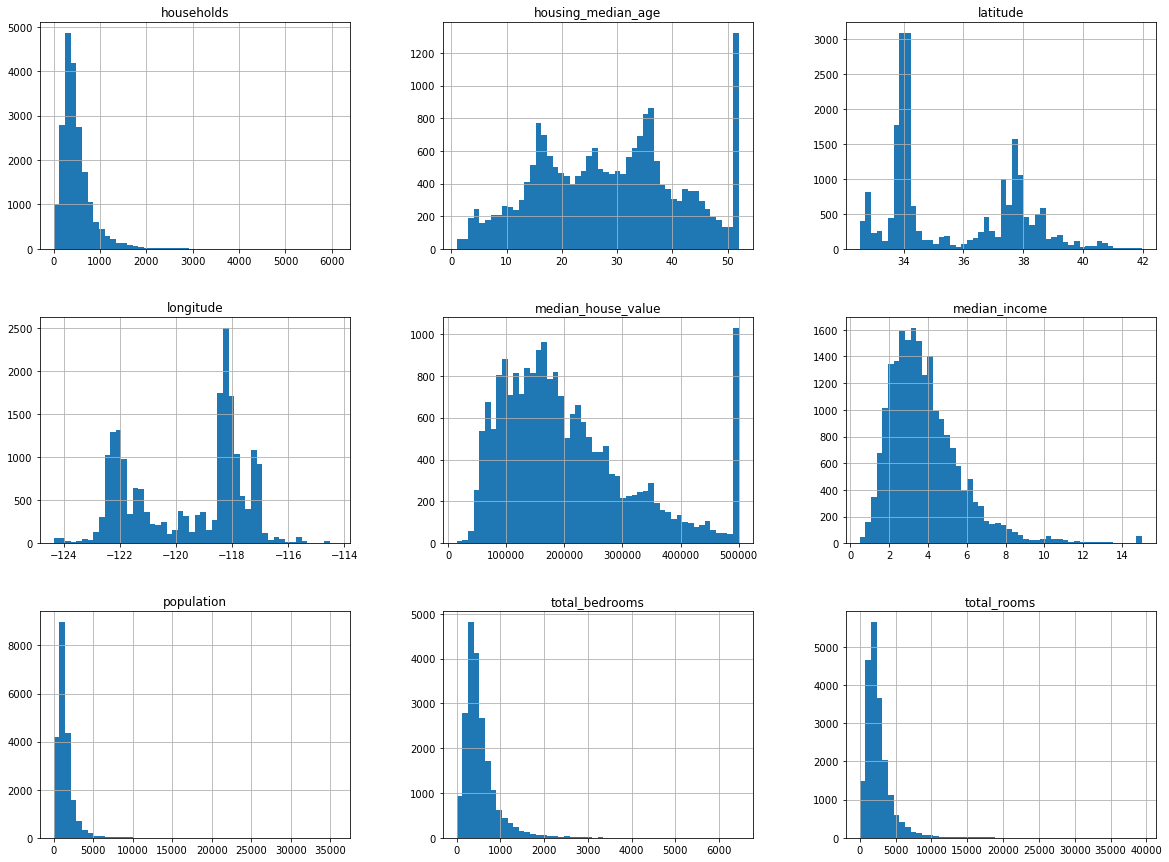

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
import numpy as np

In [15]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(data, test_ratio=.2)

In [17]:
print(len(train_set), "train +", len(test_set),' test')

16512 train + 4128  test


In [18]:
import hashlib

In [19]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [20]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[-in_test_set], data.loc[in_test_set]

In [21]:
housing_data_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(housing_data_with_id, 0.2, 'index')

In [22]:
housing_data_with_id['id'] = data['longitude'] * 1000 + data['latitude']

In [23]:
train_set, test_set = split_train_test_by_id(housing_data_with_id, 0.2, 'id')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

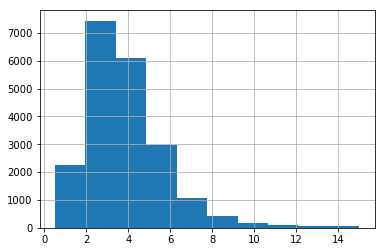

In [26]:
data['median_income'].hist(bins=10)
plt.show()

In [27]:
data['income_cat'] = np.ceil(data['median_income'] / 1.5)

In [28]:
data['income_cat'].where(data['income_cat'] < 5, 5.0, inplace=True)

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [31]:
for train_index, test_index in split.split(data, data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [32]:
data['income_cat'].value_counts() / len(data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [33]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [34]:
data = train_set.copy()

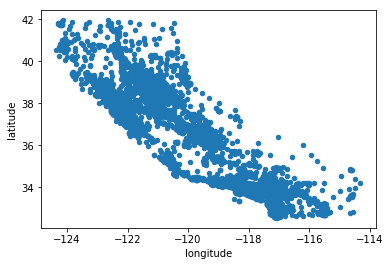

In [35]:
data.plot(kind='scatter', x='longitude', y='latitude')

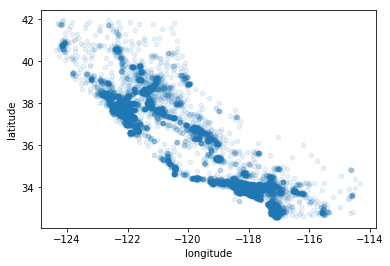

In [36]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

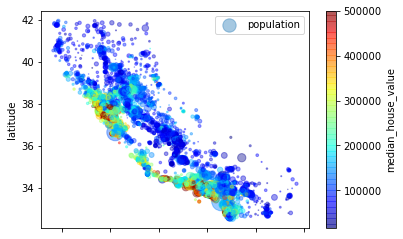

In [37]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
         s=data['population']/100, label='population', c='median_house_value', 
         cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [38]:
corr_matrix = data.corr()

In [39]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [40]:
from pandas.tools.plotting import scatter_matrix

In [41]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119092518>,
      dtype=object)

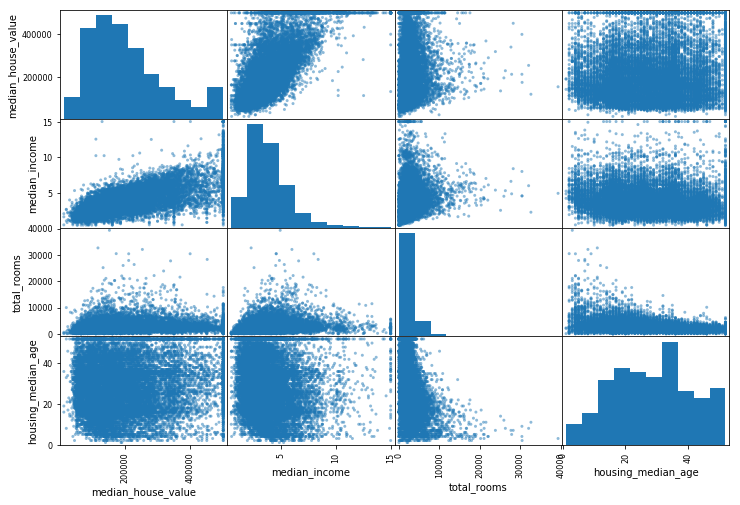

In [42]:
scatter_matrix(data[attributes], figsize=(12,8))

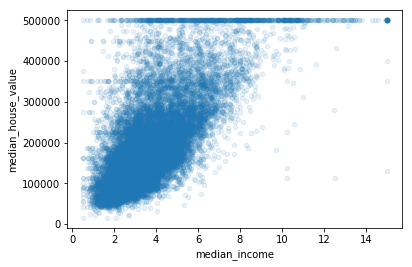

In [43]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [44]:
data['rooma_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [45]:
corr_matrix = data.corr()

In [46]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooma_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [47]:
data = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [48]:
from sklearn.preprocessing import Imputer

In [49]:
imputer = Imputer(strategy='median')

In [50]:
housing_num = data.drop('ocean_proximity', axis=1)

In [51]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [52]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [53]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [54]:
X = imputer.transform(housing_num)

In [55]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
encoder = LabelEncoder()

In [58]:
housing_cat = data['ocean_proximity']

In [59]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [60]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [61]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
encoder = OneHotEncoder()

In [64]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [65]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [66]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
from sklearn.preprocessing import LabelBinarizer

In [68]:
encoder = LabelBinarizer()

In [69]:
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [93]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [94]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin

In [96]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [97]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no args or kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [98]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [99]:
housing_extra_attribs = attr_adder.transform(data.values)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy = 'median')), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

In [102]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [103]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [104]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [105]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [106]:
housing_prepared = full_pipeline.fit_transform(data)

In [107]:
housing_prepared.shape

(16512, 16)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lin_reg = LinearRegression()

In [110]:
lin_reg.fit(housing_prepared, housing_labels)

/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
some_data = data.iloc[:5]

In [112]:
some_labels = housing_labels.iloc[:5]

In [113]:
some_data_prepared = full_pipeline.transform(some_data)

In [114]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849878]


In [115]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
housing_predictions = lin_reg.predict(housing_prepared)

In [118]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [119]:
lin_mse = np.sqrt(lin_mse)

In [120]:
lin_mse

68628.19819848922

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
tree_reg = DecisionTreeRegressor()

In [123]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [125]:
housing_predictions = tree_reg.predict(housing_prepared)

In [126]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [127]:
tree_mse = np.sqrt(tree_mse)

In [128]:
tree_mse

0.0

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring='neg_mean_squared_error', cv=10)

In [134]:
tree_rmse_scores = np.sqrt(-scores)

In [135]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [138]:
display_scores(tree_rmse_scores)

Scores: [69316.02634772 65498.84994772 71404.25935862 69098.46240168
 70580.30735263 75540.88413124 69717.93143674 70428.42648461
 75888.17618283 68976.12268448]
Mean: 70644.94463282847
Standard deviation: 2938.9378926251234


In [140]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                            scoring='neg_mean_squared_error', cv=10)

In [141]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [142]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70361.18285107 74742.02956966
 68022.09224176 71193.07033936 64969.63056405 68276.69992785
 71543.69797334 67665.10082067]
Mean: 69051.63607986609
Standard deviation: 2732.3924256191


In [143]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
forest_reg = RandomForestRegressor()

In [147]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [148]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                            scoring='neg_mean_squared_error', cv=10)

In [149]:
forest_rsme_scores = np.sqrt(-forest_scores)

In [150]:
display_scores(forest_rsme_scores)

Scores: [51456.36970341 49655.64685851 53348.43463562 54482.08525421
 51952.74356041 54631.6502789  50652.57926391 50049.76730169
 55728.91308856 52564.10718827]
Mean: 52452.22971334962
Standard deviation: 1962.0195695190785


In [151]:
#Use for downloading the model

'''
from sklearn.externals import joblib

joblib.dump(my_model, 'my_model.pkl')

my_model_loaded = joblib.load('my_model.pkl')
'''

"\nfrom sklearn.externals import joblib\n\njoblib.dump(my_model, 'my_model.pkl')\n\nmy_model_loaded = joblib.load('my_model.pkl')\n"

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [154]:
forest_reg = RandomForestRegressor()

In [155]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

In [156]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [157]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [158]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [159]:
cvres = grid_search.cv_results_

In [160]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65271.314808433046 {'max_features': 2, 'n_estimators': 3}
55464.757999636066 {'max_features': 2, 'n_estimators': 10}
52983.7450186521 {'max_features': 2, 'n_estimators': 30}
60015.91769660093 {'max_features': 4, 'n_estimators': 3}
52904.520716003 {'max_features': 4, 'n_estimators': 10}
50489.165680979044 {'max_features': 4, 'n_estimators': 30}
60164.827860316 {'max_features': 6, 'n_estimators': 3}
52016.65434631903 {'max_features': 6, 'n_estimators': 10}
49880.80313395573 {'max_features': 6, 'n_estimators': 30}
59401.785085260875 {'max_features': 8, 'n_estimators': 3}
51949.95855300033 {'max_features': 8, 'n_estimators': 10}
49992.38348066959 {'max_features': 8, 'n_estimators': 30}
62451.093310952245 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54834.76803574216 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60153.4193941994 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52653.13590989229 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [161]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [162]:
feature_importances

array([7.59589433e-02, 7.81002110e-02, 4.28503680e-02, 1.77745483e-02,
       1.60971666e-02, 1.75922993e-02, 1.62287426e-02, 3.34187004e-01,
       5.81656394e-02, 1.07103219e-01, 8.08563218e-02, 1.00778811e-02,
       1.34833145e-01, 5.93760827e-05, 3.32024461e-03, 6.79488985e-03])

In [164]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3341870039890608, 'median_income'),
 (0.13483314477663969, 'INLAND'),
 (0.10710321930987061, 'pop_per_hhold'),
 (0.08085632180408638, 'bedrooms_per_room'),
 (0.07810021099435599, 'latitude'),
 (0.07595894333344998, 'longitude'),
 (0.058165639357674284, 'rooms_per_hhold'),
 (0.04285036797402527, 'housing_median_age'),
 (0.01777454831607723, 'total_rooms'),
 (0.017592299257180234, 'population'),
 (0.01622874264009945, 'households'),
 (0.01609716663726076, 'total_bedrooms'),
 (0.010077881068120954, '<1H OCEAN'),
 (0.0067948898486822566, 'NEAR OCEAN'),
 (0.0033202446106837297, 'NEAR BAY'),
 (5.937608273241624e-05, 'ISLAND')]

In [165]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [166]:
final_rmse

47503.11477731881